####1)Importing the Libraries

In [ ]:
import pandas as pd
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score
from sklearn.model_selection import train_test_split

### 2)Data reading and processing

In [ ]:
daily=pd.read_csv('/content/daily_weather.csv')  #the data is not very meaningful whether overfitting is or not .

In [ ]:
daily.head() # High humidity after 3pm if there is high humidity we can't play the match.

,air_pressure_9am,air_temp_9am,avg_wind_direction_9am,avg_wind_speed_9am,max_wind_direction_9am,max_wind_speed_9am,rain_accumulation_9am,rain_duration_9am,relative_humidity_9am,high_humidity_3pm
0,918.060000,74.822000,271.100000,2.080354,295.400000,2.863283,0.0,0.0,42.420000,1
1,917.347688,71.403843,101.935179,2.443009,140.471549,3.533324,0.0,0.0,24.328697,0
2,923.040000,60.638000,51.000000,17.067852,63.700000,22.100967,0.0,20.0,8.900000,0
3,920.502751,70.138895,198.832133,4.337363,211.203341,5.190045,0.0,0.0,12.189102,0
4,921.160000,44.294000,277.800000,1.856660,136.500000,2.863283,8.9,14730.0,92.410000,1


In [ ]:
#data will have overfitting  inside the dataset

In [ ]:
daily.shape

(1095, 10)

In [ ]:
daily.info()        #allthe data is in numerical format  otherwise encoding in random forest

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1095 entries, 0 to 1094
Data columns (total 10 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   air_pressure_9am        1092 non-null   float64
 1   air_temp_9am            1090 non-null   float64
 2   avg_wind_direction_9am  1091 non-null   float64
 3   avg_wind_speed_9am      1092 non-null   float64
 4   max_wind_direction_9am  1092 non-null   float64
 5   max_wind_speed_9am      1091 non-null   float64
 6   rain_accumulation_9am   1089 non-null   float64
 7   rain_duration_9am       1092 non-null   float64
 8   relative_humidity_9am   1095 non-null   float64
 9   high_humidity_3pm       1095 non-null   int64  
dtypes: float64(9), int64(1)
memory usage: 85.7 KB


In [ ]:
daily.isnull().sum()

air_pressure_9am          3
air_temp_9am              5
avg_wind_direction_9am    4
avg_wind_speed_9am        3
max_wind_direction_9am    3
max_wind_speed_9am        4
rain_accumulation_9am     6
rain_duration_9am         3
relative_humidity_9am     0
high_humidity_3pm         0
dtype: int64

In [ ]:
#drop all the rows which has missing values

In [ ]:
daily.dropna(inplace=True)

In [ ]:
daily.info()

<class 'pandas.core.frame.DataFrame'>
Index: 1064 entries, 0 to 1094
Data columns (total 10 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   air_pressure_9am        1064 non-null   float64
 1   air_temp_9am            1064 non-null   float64
 2   avg_wind_direction_9am  1064 non-null   float64
 3   avg_wind_speed_9am      1064 non-null   float64
 4   max_wind_direction_9am  1064 non-null   float64
 5   max_wind_speed_9am      1064 non-null   float64
 6   rain_accumulation_9am   1064 non-null   float64
 7   rain_duration_9am       1064 non-null   float64
 8   relative_humidity_9am   1064 non-null   float64
 9   high_humidity_3pm       1064 non-null   int64  
dtypes: float64(9), int64(1)
memory usage: 91.4 KB


In [ ]:
daily.duplicated()   #mark the duplicate rows

0       False
1       False
2       False
3       False
4       False
        ...  
1090    False
1091    False
1092    False
1093    False
1094    False
Length: 1064, dtype: bool

In [ ]:
daily[daily.duplicated()]  #print the duplicate rows

,air_pressure_9am,air_temp_9am,avg_wind_direction_9am,avg_wind_speed_9am,max_wind_direction_9am,max_wind_speed_9am,rain_accumulation_9am,rain_duration_9am,relative_humidity_9am,high_humidity_3pm
543,921.65,62.87,56.7,10.714943,77.3,13.712442,0.0,0.0,21.11,0


In [ ]:
daily.dropna()

,air_pressure_9am,air_temp_9am,avg_wind_direction_9am,avg_wind_speed_9am,max_wind_direction_9am,max_wind_speed_9am,rain_accumulation_9am,rain_duration_9am,relative_humidity_9am,high_humidity_3pm
0,918.060000,74.822000,271.100000,2.080354,295.400000,2.863283,0.0,0.0,42.420000,1
1,917.347688,71.403843,101.935179,2.443009,140.471549,3.533324,0.0,0.0,24.328697,0
2,923.040000,60.638000,51.000000,17.067852,63.700000,22.100967,0.0,20.0,8.900000,0
3,920.502751,70.138895,198.832133,4.337363,211.203341,5.190045,0.0,0.0,12.189102,0
4,921.160000,44.294000,277.800000,1.856660,136.500000,2.863283,8.9,14730.0,92.410000,1
...,...,...,...,...,...,...,...,...,...,...
1090,918.900000,63.104000,192.900000,3.869906,207.300000,5.212070,0.0,0.0,26.020000,1
1091,918.710000,49.568000,241.600000,1.811921,227.400000,2.371156,0.0,0.0,90.350000,1
1092,916.600000,71.096000,189.300000,3.064608,200.800000,3.892276,0.0,0.0,45.590000,1
1093,912.600000,58.406000,172.700000,3.825167,189.100000,4.764682,0.0,0.0,64.840000,1


In [ ]:
#delete the duplicate rows

In [ ]:
daily.drop_duplicates(inplace=True)

In [ ]:
#check the data imbalance

In [ ]:
daily['high_humidity_3pm'].value_counts()

high_humidity_3pm
0    534
1    529
Name: count, dtype: int64

In [ ]:
534/1063

0.5023518344308561

In [ ]:
529/1063             #data is somewhat balanced

0.49764816556914393

####3.Machine Learning Process

In [ ]:
X=daily.drop(columns='high_humidity_3pm')
y=daily['high_humidity_3pm']

train-test split

In [ ]:
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.1)

In [ ]:
#scaling of the data is not required because it is a tree based algorithm .

Apply Decision Tree Classifier on the data.

In [ ]:
dec_tree=DecisionTreeClassifier(max_depth=5,criterion='gini/entropy ') # we have not written anything inside the bracket   #anything we write inside bracket is known as hyperparameter

In [ ]:
#gini/entropy in whatever accuracy becomes good

In [ ]:
#OlD ID3  ENTROPY ALGORITHM ,NEW CART GINI

In [ ]:
dec_tree.fit(X_train,y_train)    #it started learning the data

DecisionTreeClassifier(max_depth=5)

In [ ]:
y_pred=dec_tree.predict(X_test)

In [ ]:
y_pred

array([0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 1, 0, 1, 0, 0, 0, 1, 0, 1, 0, 1, 0,
       1, 1, 0, 1, 1, 1, 1, 1, 0, 1, 0, 0, 0, 1, 1, 1, 1, 1, 0, 1, 0, 0,
       0, 1, 0, 1, 0, 1, 0, 1, 1, 1, 1, 0, 1, 1, 0, 0, 1, 0, 0, 0, 1, 0,
       0, 1, 1, 0, 1, 0, 0, 1, 0, 0, 0, 0, 1, 0, 1, 0, 1, 1, 0, 1, 0, 0,
       1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 0, 1, 0, 1, 1, 0])

In [ ]:
y_test

715    1
761    0
436    1
771    0
865    0
      ..
149    0
967    0
607    1
531    1
952    0
Name: high_humidity_3pm, Length: 107, dtype: int64

In [ ]:
accuracy_score(y_test,y_pred)              #we have imporved overfitting by changing the max_depth

0.8504672897196262

In [ ]:
#this above score 89% could have been betterbut because of overfitting it is stopping it to be better.#overfitting is a problem when you ,when you overcome it the accuracy score increases

In [ ]:
#at any of these sections we have not checked overfitting problem

**check the overfitting in the data**

In [ ]:
y_pred_train=dec_tree.predict(X_train)

In [ ]:
accuracy_score(y_train,y_pred_train)   #it should never be 100%it should 97% 96%  but not 100% means overlearnn some answers   #overfitting is a problem when you ,when you overcome it the accuracy score increases

0.9403765690376569

In [ ]:
#dec_tree=DecisionTreeClassifier(max_depth=4)we have controlled he overfitting problem as accuracy score changes to 97%

Overfitting cases


1.   if X_train accuracy is 1.0 then it is definitely overfitting
2.   if the difference between X_train and X_test score is more than 10% then it is overfitting

1.   if the training score is over 80% then only they show overfitting





In [ ]:
#overfitting only when the score is  at least more than 80% otherwise it would underfirtting ex 78% and 65% not overfitting
#2)83% and70% yes overfitting

Whenever we have data ,we have algortihm.If we have classification data we have classification algorithmlike Logistic Regression,Decision Trees ,Random Forest. How do we know which algorthm to apply exactly that.



Small Dataset:Logistic Regression,KNN, SVM
LARGE DATASET: Tree Based Algorithm don't work well in small dataset(Decison Tree,Random Forest,XGboost,Gradient Boost)

XgBoost will give the highest score.SO we will keep this one and delete the rest of them.

Data is fixed ,Algorithm is fixed .If we give more data ,the performance of the model increases.We can imporve the data

** blue: Underfitting      Red:overfitting  Green:best One**




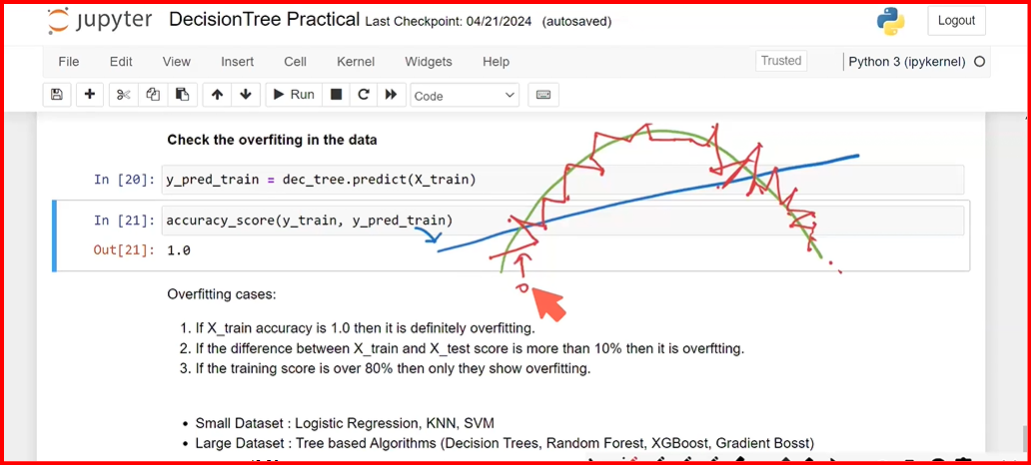



*   Decision tree is dependent upon the input columns 50 input columns means larrger tree and 20 input columns means smaller tree




Larger tree meansovfitting of decision tree

In [ ]:
#when plotting a tree ,it becomes a goodmodel but after certain depth it starts to overlearn or overfit .

Suppose if there is a decision threes with 500 columns and 1 million rows ,then making a decesion tree will take time.So we can make the max_rows to 200 columns we have to identify which 200 columns are important to us.It will create a decision tree out of those 200 columns.When e take less number of columns thre tree would be smaller and it would be faster.we can take sqrt(500) to max_features.
When the decision tree is having more than 100 columns then we try max_features.this is known as hyper parameters .In the real world Customer wants to see the result very fast and accracy of results also matter a lot.Google ,Amazon ,Microsoft work with very large datasets.

In [ ]:
# when we are searching of best  hyper parameters we are hyperparameters tuning.
#High accuracy is required in medical field  68% accuracy in loansof banks means 32% wrong prediction we can compensate with other 68% .We would increase the performance of model if still it is showing some error thenit is fine.

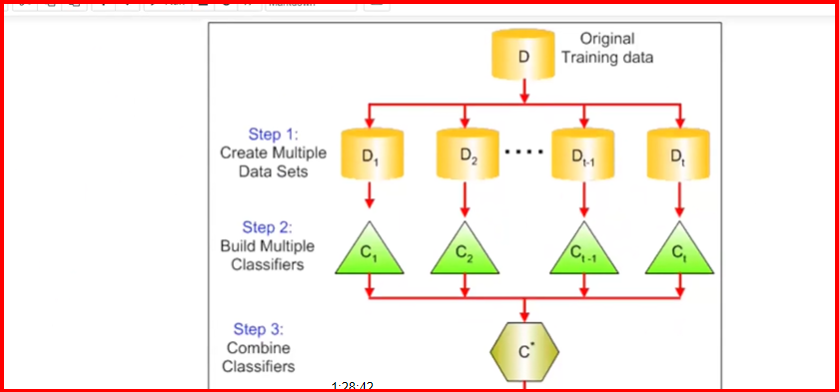

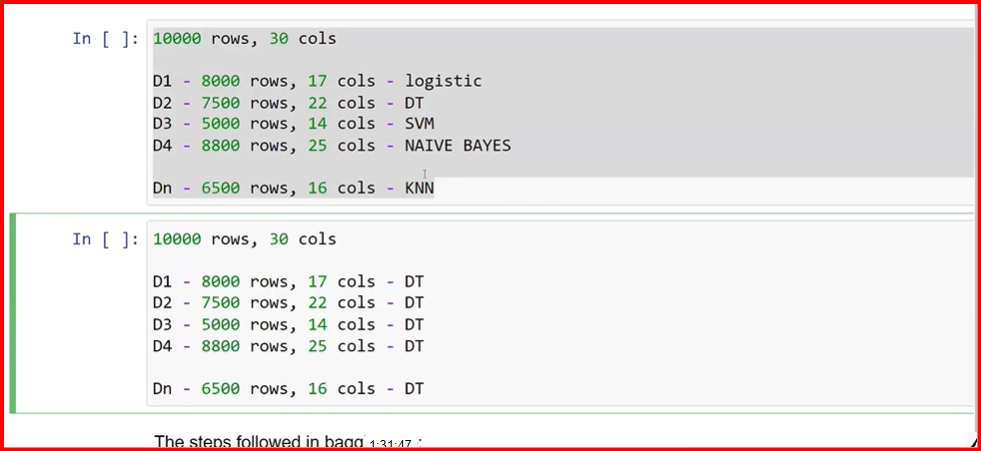

In [ ]:
#We don't have formulas in random forest it is a simple approach.
#Diferent varsions have been created by different researchers to make our decision trees more efficient and faster c4.1,c4.2,c4.3,ID3,CART ALGORITHM.
#CART ALGORITHM IS A NEW ALGORITHM THAT CANSOLVE CLASSIFICATION AND REGRESSION ALSO.